<a href="https://colab.research.google.com/github/FiyinfobaO/face_detection/blob/main/face_detection_iqube_interview_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import libraries
import cv2
import numpy as np
import pandas as pd
import dlib
import time
from google.colab import drive, files
from google.colab.patches import cv2_imshow

In [2]:
# mount the drive
drive.mount('/content/drive/')

Mounted at /content/drive/


###1st Image 

In [29]:
# reading the 1st image file
img1 = pd.read_csv('/content/drive/MyDrive/interview task 2/input/input00.txt', delimiter=' ', header=None, skiprows=1)
img1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869
0,"2,6,184","31,24,158","79,57,129","112,71,98","117,63,68","120,63,64","133,80,77","143,90,80","124,67,58","127,64,60","125,61,61","115,54,52","109,50,40","116,55,41","132,59,51","141,58,57","127,60,57","127,60,57","126,59,56","124,60,56","123,59,55","123,59,55","122,59,55","123,61,55","122,60,54","124,60,55","125,61,56","128,62,57","128,62,57","130,62,55","128,60,53","127,59,52","131,59,51","131,59,51","132,60,52","131,62,53","132,63,54","133,64,55","133,64,55","133,64,55",...,"175,190,222","175,190,223","174,189,222","171,186,219","170,185,218","172,187,220","173,188,221","173,188,221","176,191,223","179,194,226","181,197,226","182,198,227","186,200,228","190,205,231","195,211,234","200,216,239","204,221,242","207,224,245","208,225,244","202,219,240","201,217,240","198,212,240","190,202,230","183,194,222","128,138,162","0,2,21","0,0,10","0,1,6","0,1,1","1,2,0","2,3,0","2,3,1","2,3,1","2,2,2","2,7,0","0,0,18","4,3,77","5,5,121","1,5,140","1,10,151"
1,"6,11,174","21,17,153","54,35,128","94,59,109","116,71,88","118,66,66","124,69,62","137,82,75","141,83,77","124,63,59","118,57,53","118,58,52","111,49,43","115,50,42","130,58,51","133,56,53","126,59,56","125,58,55","124,57,54","124,57,54","122,58,54","123,59,54","125,61,56","126,62,57","123,59,54","123,59,54","125,61,56","128,62,57","129,63,58","130,62,55","129,61,54","127,59,52","131,59,51","131,59,51","132,60,52","131,62,53","132,63,54","133,64,55","133,64,55","134,65,56",...,"175,190,222","175,190,223","173,188,221","171,186,219","170,185,218","172,187,220","173,188,221","174,189,222","176,191,223","180,195,227","182,198,227","183,199,228","186,200,228","190,205,231","194,210,233","200,216,239","204,221,242","207,224,245","211,228,247","206,223,244","205,221,244","201,215,243","192,206,234","188,199,227","145,155,179","10,17,36","0,1,12","0,2,7","1,3,3","2,3,1","3,4,0","3,4,2","2,3,1","2,2,2","1,5,0","0,0,20","5,3,79","6,6,122","0,5,140","1,9,152"
2,"7,14,161","12,13,155","26,15,137","62,39,124","103,69,110","119,72,80","120,64,59","130,69,65","150,89,87","132,77,70","118,64,53","115,56,47","114,49,48","119,49,50","122,55,52","123,58,49","126,58,53","126,58,53","123,57,52","122,56,51","123,57,52","123,59,54","125,61,56","126,62,57","123,59,54","124,60,55","127,61,56","128,62,57","128,63,55","129,61,54","128,60,53","127,59,52","131,59,51","131,59,51","132,60,52","131,62,53","132,63,54","133,64,55","133,64,55","134,65,56",...,"175,190,222","175,190,223","172,187,220","171,186,219","170,185,218","172,187,220","173,188,221","175,190,223","177,192,224","180,195,227","183,199,228","184,200,229","187,201,229","190,205,231","194,210,233","200,216,239","205,222,243","208,225,246","211,226,245","207,224,245","205,221,244","200,214,242","194,208,236","189,201,229","165,175,199","28,35,54","0,2,16","1,4,9","2,4,4","4,5,3","4,5,1","3,4,2","3,4,2","2,2,2","0,4,0","0,0,24","4,3,83","5,6,126","0,5,142","2,10,154"
3,"9,15,152","11,15,163","11,9,158","29,20,141","71,51,124","113,73,101","127,71,76","128,64,63","139,78,74","147,92,83","132,78,67","112,53,44","117,49,50","122,52,58","117,53,52","112,57,48","124,56,51","124,56,51","123,55,50","122,56,51","123,57,52","124,58,53","123,59,54","124,60,55","124,60,55","128,62,57","129,64,56","129,64,56","130,62,55","128,60,53","127,59,52","126,58,51","130,58,50","131,59,51","131,59,51","130,61,52","131,62,53","132,63,54","133,64,55","134,65,56",...,"175,190,222","175,190,223","172,187,220","171,186,219","170,185,218","171,186,219","173,188,221","175,190,223","178,193,225","180,195,227","184,200,229","184,200,229","187,201,229","190,205,231","194,210,233","200,216,239","205,222,243","208,225,246","208,223,242","206,223,244","205,221,244","198,212,240","195,209,238","188,200,228","18

**Testing different preprocessing functions to clean the first pixel element** 

As we can see, each pixel element eg('2,6,184') is enclosed in a string so the following steps will be performed: 

*   Perform a split on each comma(,) to get each of the pixel value in the pixel element as a string.
*   Convert each pixel value to a float type 

 

In [32]:
# looking at the first pixel value
a = img1.iloc[0,0]
a

'2,6,184'

In [ ]:
a = a.split(',')
a

['2', '6', '184']

In [ ]:
list(map(float, a))

[2.0, 6.0, 184.0]

In [2]:
# function to remove the string from each element, convert each BGR string value
# to float and flatten out all the BGR pixel values to a list 

def str_to_float_flatten(data):
  # list to store all the BGR values
  img_flat_val = []
  # create dframe with each pixel value in each pixel element as string
  img_str_bgr = data.apply(lambda x: x.str.split(','))
  # loop through each row and column to convert bgr string pixels to float
  for x in range(len(img_str_bgr)):
    for c in img_str_bgr.columns:
      img_str_bgr.loc[x, c] = list(map(float, img_str_bgr.loc[x,c]))
      # flatten all the values to a new list
      for i in img_str_bgr.loc[x,c]:
        img_flat_val.append(i)
  return img_flat_val

# preprocessing function that converts the .txt file directly to a image array
def preprocess(data, value):
  img_pix = str_to_float_flatten(data)
  # convert to array
  img_arr = np.array(img_pix, dtype='uint8')
  # reshape the pixel array to original dimension with the channel dimension added
  if value == 1:
    img = img_arr.reshape(img1.shape[0], img1.shape[1], 3)
  elif value == 2:
    img = img_arr.reshape(img2.shape[0], img2.shape[1], 3)
  else:
    img = img_arr.reshape(img3.shape[0], img3.shape[1], 3)
  return img

In [30]:
# get the 1st image as an array
img_1_pixel = preprocess(img1, 1)

In [ ]:
# check the shape of the image array
img_1_pixel.shape

(418, 870, 3)

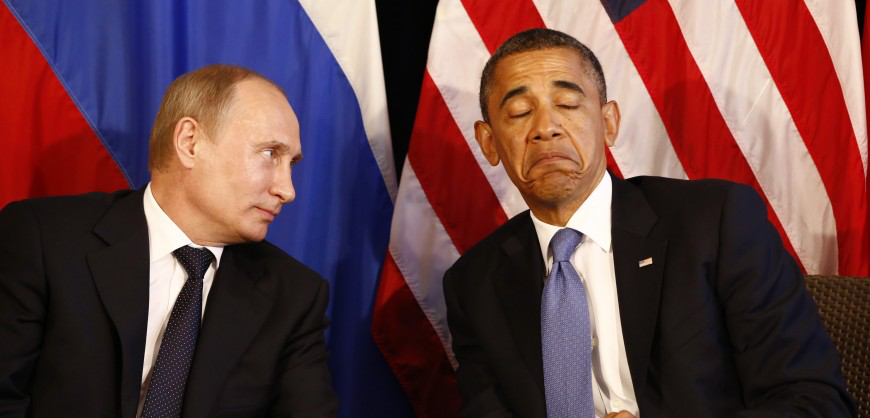

In [31]:
# view the 1st image
cv2_imshow(img_1_pixel)

####Testing Face Detection Algorithms

#####Using Open CVs built in cascade classifier for face detection

In [33]:
# create the haar cascade 
cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [34]:
# Detect faces in the image
start = time.time()

faces = cascade.detectMultiScale(
    img_1_pixel,
    scaleFactor=1.3,
    minNeighbors=1,
    minSize=(30, 30)
)

end = time.time()
print("Execution Time for Haar Cascade classifier(in seconds) : {}".format(round(end - start, 3)))

# count the no of faces detected
print("Found {} faces!".format(len(faces)))

Execution Time for Haar Cascade classifier(in seconds) : 0.042
Found 2 faces!


In [35]:
# drawing rectangles around each of the faces
for (x, y, w, h) in faces:
   cv2.rectangle(img_1_pixel, (x, y), (x+w, y+h), (140, 140, 0), 2)

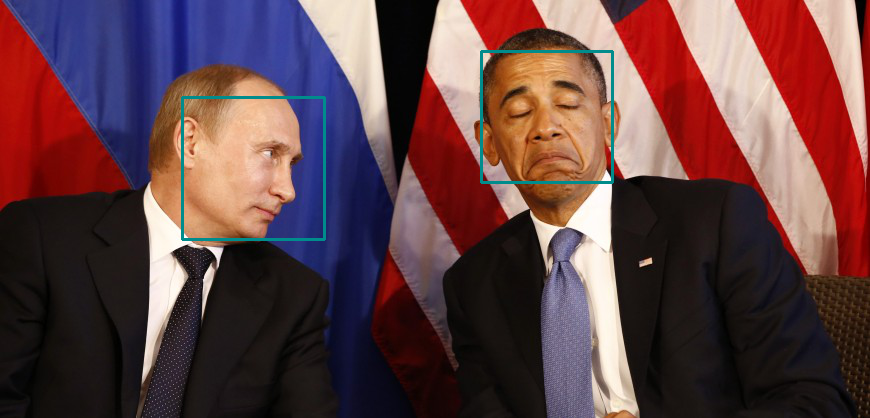

In [36]:
# viewing the 1st image with rectangles showing location of faces detected by the haar cascade algorithm
cv2_imshow(img_1_pixel)

*The Haar cascade classifier was able to detect the 2 faces in the image as seen from the cyan colored rectangles*

#####Using Histogram of Oriented Gradients(HOG) face detection model in Dlib

In [37]:
# initialize hog based face detector
hog_face_detector = dlib.get_frontal_face_detector()

In [38]:
# Hog
start = time.time()

# apply face detection (hog)
faces_hog = hog_face_detector(img_1_pixel, 1)

end = time.time()
print("Execution Time for HOG(in seconds) : ", format(end-start, '.3f'))

# loop over detected faces
for face in faces_hog:
    x = face.left()
    y = face.top()
    w = face.right() - x
    h = face.bottom() - y

    # drawing rectangles over each faces
    cv2.rectangle(img_1_pixel, (x,y), (x+w,y+h), (0,255,0), 2)

# count the no of faces detected
print("Found {} faces!".format(len(faces_hog)))

Execution Time for HOG(in seconds) :  0.232
Found 2 faces!


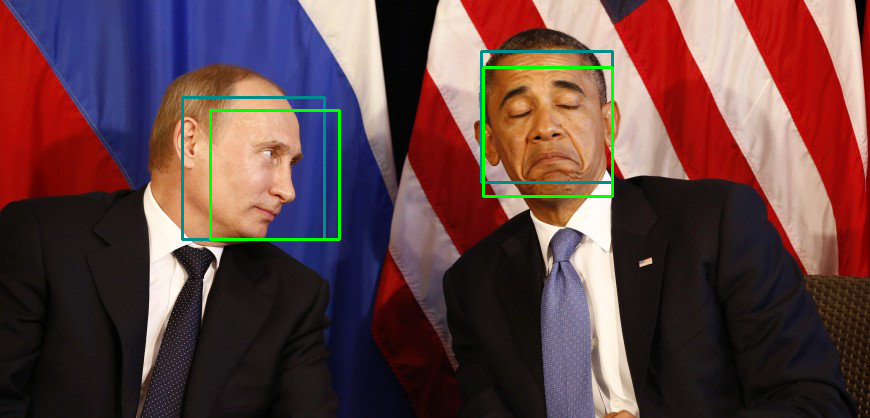

In [39]:
# viewing the 1st image with rectangles showing location of faces detected by the hog algorithm
cv2_imshow(img_1_pixel)

*The Hog algorithm was able to detect the 2 faces in the image as seen from the green colored rectangles*

##### Using the CNN based face detector model in Dlib

In [3]:
# download the weights
! wget http://arunponnusamy.com/files/mmod_human_face_detector.dat

--2021-02-21 22:57:06--  http://arunponnusamy.com/files/mmod_human_face_detector.dat
Resolving arunponnusamy.com (arunponnusamy.com)... 185.199.109.153, 185.199.111.153, 185.199.108.153, ...
Connecting to arunponnusamy.com (arunponnusamy.com)|185.199.109.153|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.arunponnusamy.com/files/mmod_human_face_detector.dat [following]
--2021-02-21 22:57:06--  https://www.arunponnusamy.com/files/mmod_human_face_detector.dat
Resolving www.arunponnusamy.com (www.arunponnusamy.com)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to www.arunponnusamy.com (www.arunponnusamy.com)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 729940 (713K) [application/octet-stream]
Saving to: ‘mmod_human_face_detector.dat.3’

mmod_human_face_det 100%[===================>] 712.83K  --.-KB/s    in 0.01s   

2021-02-21 22:57:07 (68.4 MB/s) - ‘mmod_human_face_de

In [ ]:
weights = '/content/mmod_human_face_detector.dat'

In [40]:
# initialize cnn based face detector with the weights
cnn_face_detector = dlib.cnn_face_detection_model_v1(weights)

In [41]:
start = time.time()

# apply face detection (cnn)
faces_cnn = cnn_face_detector(img_1_pixel, 1)

end = time.time()
print("Execution Time for CNN(in seconds): ", format(end - start, '.3f'))

# loop over detected faces
for face in faces_cnn:
    x = face.rect.left()
    y = face.rect.top()
    w = face.rect.right() - x
    h = face.rect.bottom() - y

    # drawing rectangles over each faces
    cv2.rectangle(img_1_pixel, (x,y), (x+w,y+h), (0,0,255), 2)

# count the no of faces detected
print("Found {} faces!".format(len(faces_cnn)))

Execution Time for CNN(in seconds):  0.161
Found 2 faces!


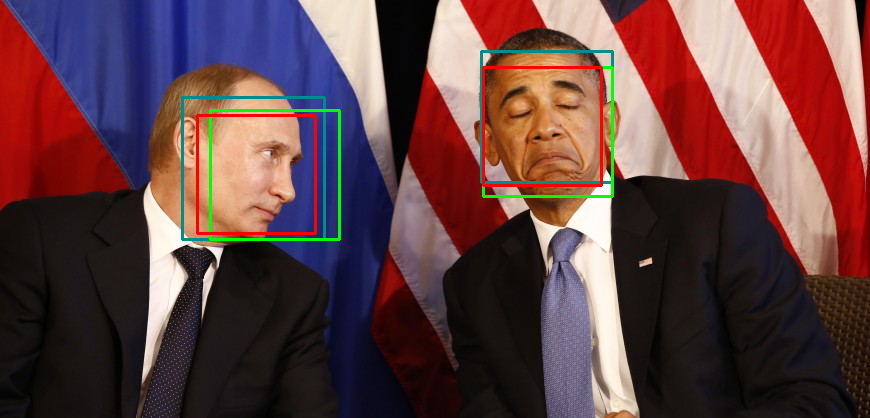

In [42]:
# viewing the 1st image with rectangles showing location of faces detected by the cnn algorithm
cv2_imshow(img_1_pixel)

*The CNN based algorithm was able to detect the 2 faces in the image as seen from the red colored rectangles*

For the 1st image, the Haar cascade classifier performed best in terms of both *speed* and *accuracy* because it was able to detect all 2 faces in 0.042s which was the shortest time when compared with the other 2 algorithms

###2nd Image

In [3]:
# reading the 2nd image file
img2 = pd.read_csv('/content/drive/MyDrive/interview task 2/input/input01.txt', delimiter=' ', header=None, skiprows=1)
img2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290
0,"190,119,69","190,119,69","191,120,70","192,121,71","192,121,71","193,122,72","194,123,73","194,123,73","194,123,73","195,124,74","195,124,74","196,125,75","197,126,76","198,127,77","198,127,77","199,128,78","204,123,78","204,124,77","202,124,77","201,125,77","198,126,78","196,127,78","193,127,78","192,129,79","194,130,82","194,130,82","194,129,84","196,128,85","197,128,85","199,127,87","199,127,87","201,126,87","199,133,92","199,130,90","197,127,87","200,123,84","203,122,84","209,122,82","214,124,83","218,126,83",...,"197,126,76","197,126,76","197,126,76","197,126,76","197,126,76","195,125,72","195,125,72","194,124,71","193,122,72","192,121,71","189,120,70","188,119,69","187,118,69","186,119,70","184,116,69","176,108,61","142,76,28","133,67,19","185,118,73","185,118,73","184,117,72","195,124,74","195,124,74","196,125,75","196,125,75","197,126,76","198,127,77","199,128,78","199,128,78","200,129,79","200,129,79","199,128,78","198,127,77","198,127,77","197,126,76","196,125,75","196,125,75","197,126,76","197,126,76","197,126,76"
1,"191,120,70","191,120,70","192,121,71","193,122,72","193,122,72","194,123,73","195,124,74","195,124,74","195,124,74","196,125,75","196,125,75","197,126,76","198,127,77","199,128,78","199,128,78","200,129,79","205,124,79","203,125,79","203,125,79","200,126,78","199,127,79","197,128,79","196,129,80","195,129,80","197,131,82","197,131,83","197,131,83","198,130,85","200,129,85","202,128,86","202,128,86","202,128,86","201,133,88","200,132,87","201,130,86","204,128,86","205,126,85","208,126,85","210,125,85","211,126,86",...,"197,126,76","197,126,76","197,126,76","197,126,76","197,126,76","196,126,73","195,125,72","194,124,71","193,122,72","192,121,71","189,120,70","188,119,69","188,119,70","186,119,70","184,116,69","177,109,62","144,78,30","133,67,19","185,118,73","186,119,74","184,117,72","195,124,74","195,124,74","196,125,75","197,126,76","198,127,77","198,127,77","199,128,78","199,128,78","200,129,79","200,129,79","199,128,78","199,128,78","198,127,77","197,126,76","197,126,76","196,125,75","197,126,76","197,126,76","197,126,76"
2,"193,122,72","193,122,72","194,123,73","195,124,74","196,125,75","196,125,75","197,126,76","197,126,76","197,126,76","197,126,76","198,127,77","199,128,78","200,129,79","200,129,79","201,130,80","201,130,80","205,126,83","205,127,81","204,127,81","203,129,81","201,129,81","199,130,80","200,131,81","198,132,81","200,134,83","200,134,83","202,133,83","202,133,84","204,132,85","206,131,85","206,131,85","206,131,87","205,132,80","206,133,83","207,133,85","208,133,87","208,133,89","205,131,89","202,129,91","199,128,91",...,"198,127,77","198,127,77","198,127,77","198,127,77","198,127,77","196,126,73","196,126,73","195,125,72","194,123,73","193,122,72","190,121,71","189,120,70","188,119,70","186,119,70","183,115,68","180,112,65","146,80,32","131,65,17","184,117,72","188,121,76","185,118,73","196,125,75","196,125,75","197,126,76","197,126,76","198,127,77","199,128,78","200,129,79","200,129,79","201,130,80","201,130,80","200,129,79","199,128,78","199,128,78","198,127,77","197,126,76","197,126,76","197,126,76","197,126,76","197,126,76"
3,"196,125,75","196,125,75","197,126,76","197,126,76","198,127,77","199,128,78","200,129,79","200,129,79","199,128,78","200,129,79","200,129,79","201,130,80","202,131,81","203,132,82","203,132,82","203,132,82","206,128,85","205,130,86","205,130,86","205,130,84","204,132,84","204,133,83","204,134,81","202,134,81","207,137,83","207,137,83","207,137,84","209,136,84","209,136,86","211,135,86","211,135,86","211,135,87","211,134,77","211,136,80","212,137,85","210,138,90","205,138,93","198,136,96","192,134,98","185,131,100",...,"199,128,78","199,128,78","199,128,78","199,128,78","199,128,78","

**Testing different preprocessing functions to clean the first pixel element** 

As we can see, each pixel element eg('190,119,69') is enclosed in a string so the following steps will be performed: 

*   Perform a split on each comma(,) to get each of the pixel value in the pixel element as a string.
*   Convert each pixel value to a float type 

 

In [ ]:
# looking at the first pixel value
a = img2.iloc[0,0]
a

'190,119,69'

In [ ]:
a = a.split(',')
a

['190', '119', '69']

In [ ]:
list(map(float, a))

[190.0, 119.0, 69.0]

In [12]:
# get the 2nd image as an array 
img_2_pixel = preprocess(img2, 2)

In [ ]:
# check the shape of the image array
img_2_pixel.shape

(173, 291, 3)

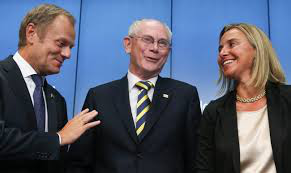

In [ ]:
# view the 2nd image
cv2_imshow(img_2_pixel)

####Testing Face Detection Algorithms

#####Using Open CVs built in cascade classifier for face detection

In [5]:
# create the haar cascade 
cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [6]:
# Detect faces in the image
start = time.time()

faces = cascade.detectMultiScale(
    img_2_pixel,
    scaleFactor=1.003,
    minNeighbors=3,
    minSize=(5,5)
)

end = time.time()
print("Execution Time for Haar Cascade classifier(in seconds) : {}".format(round(end - start, 3)))

# count the no of faces detected
print("Found {} faces!".format(len(faces)))

Execution Time for Haar Cascade classifier(in seconds) : 0.803
Found 4 faces!


In [7]:
# drawing rectangles around each of the faces
for (x, y, w, h) in faces:
   cv2.rectangle(img_2_pixel, (x, y), (x+w, y+h), (140, 140, 0), 2)

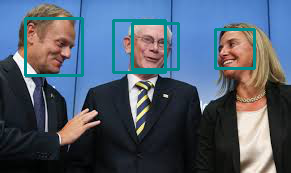

In [8]:
# viewing the 2nd image with rectangles showing location of faces detected by the haar cascade algorithm
cv2_imshow(img_2_pixel)

*The Haar cascade classifier was able to detect the 3 faces in the image as seen from the cyan colored rectangles but it created an extra detection giving a total of 4 faces rather than 3*

#####Using Histogram of Oriented Gradients(HOG) face detection model in Dlib

In [80]:
# initialize hog + svm based face detector
hog_face_detector = dlib.get_frontal_face_detector()

In [ ]:
# Hog
start = time.time()

# apply face detection (hog)
faces_hog = hog_face_detector(img_2_pixel, 1)

end = time.time()
print("Execution Time for HOG(in seconds) : ", format(end-start, '.3f'))

# loop over detected faces
for face in faces_hog:
    x = face.left()
    y = face.top()
    w = face.right() - x
    h = face.bottom() - y

    # drawing rectangles over each faces
    cv2.rectangle(img_2_pixel, (x,y), (x+w,y+h), (0,255,0), 2)

# count the no of faces detected
print("Found {} faces!".format(len(faces_hog)))

Execution Time for HOG(in seconds) :  0.035
Found 2 faces!


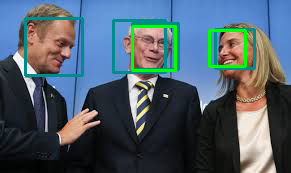

In [22]:
# viewing the 2nd image with rectangles showing location of faces detected by the hog algorithm
cv2_imshow(img_2_pixel)

*The Hog algorithm was able to detect only 2 of the 3 faces in the image as seen from the green colored rectangles*

##### Using the CNN based face detector model in Dlib

In [84]:
weights = '/content/mmod_human_face_detector.dat'

In [89]:
# initialize cnn based face detector with the weights
cnn_face_detector = dlib.cnn_face_detection_model_v1(weights)

In [87]:
start = time.time()

# apply face detection (cnn)
faces_cnn = cnn_face_detector(img_2_pixel, 1)

end = time.time()
print("Execution Time for CNN(in seconds): ", format(end - start, '.3f'))

# loop over detected faces
for face in faces_cnn:
    x = face.rect.left()
    y = face.rect.top()
    w = face.rect.right() - x
    h = face.rect.bottom() - y

    # drawing rectangles over each faces
    cv2.rectangle(img_2_pixel, (x,y), (x+w,y+h), (255,0,0), 2)

# count the no of faces detected
print("Found {} faces!".format(len(faces_cnn)))

Execution Time for CNN(in seconds):  1.017
Found 3 faces!


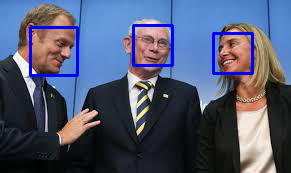

In [88]:
# viewing the 2nd image with rectangles showing location of faces detected by the cnn algorithm
cv2_imshow(img_2_pixel)

*The CNN based algorithm was able to detect all 3 faces in the image as seen from the blue colored rectangles.*

For the 2nd image, the CNN based face detector model performed best in terms of accuracy because it was able to detect all 3 faces but in terms of *speed*, the HOG model performed the best as it took 0.035s to detect 2 out of the 3 faces.
The CNN however took 1.017s

###3rd Image

In [4]:
# reading the 3rd image file
img3 = pd.read_csv('/content/drive/MyDrive/interview task 2/input/input02.txt', delimiter=' ', header=None, skiprows=1)
img3

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459
0,"174,155,147","176,155,147","177,156,148","179,157,146","180,158,146","180,159,144","183,160,145","181,160,145","187,166,151","184,165,150","183,166,153","185,169,157","185,170,161","182,170,160","180,169,161","179,170,161","196,170,164","191,167,161","188,168,163","189,175,169","183,174,170","164,161,156","141,145,140","127,134,131","104,115,113","87,97,97","85,94,97","98,105,108","110,114,119","123,126,131","131,130,139","126,125,134","125,126,130","115,116,120","112,115,119","120,125,128","117,124,127","104,113,116","100,112,114","107,119,121",...,"146,154,153","153,161,160","143,151,150","125,133,132","122,130,129","110,118,117","107,115,114","116,124,123","122,130,129","118,126,125","114,122,121","116,124,123","148,153,152","155,160,159","152,157,156","139,144,143","132,137,136","133,138,137","129,133,134","118,122,123","121,125,126","136,139,143","139,142,146","129,132,136","124,127,131","124,127,132","114,117,122","96,99,104","101,105,106","89,93,94","100,104,105","123,127,128","125,129,130","119,123,124","121,125,126","124,128,129","104,108,109","98,102,103","94,98,99","94,98,99"
1,"175,156,148","175,156,148","178,157,149","179,159,148","182,160,148","183,162,147","183,162,147","184,163,148","187,166,151","185,166,151","185,168,155","186,170,158","185,170,161","183,171,161","183,172,164","184,173,165","197,173,167","194,172,167","192,173,168","183,171,165","165,159,154","140,139,135","121,125,120","112,119,116","105,116,114","90,100,100","87,96,99","92,99,102","92,96,101","99,102,107","111,110,119","111,110,119","113,114,118","111,112,116","117,120,124","131,136,139","133,140,143","122,131,134","110,122,124","107,119,121",...,"136,144,143","134,142,141","123,131,130","111,119,118","114,122,121","114,122,121","117,125,124","119,127,126","116,124,123","114,122,121","120,128,127","128,136,135","155,160,159","158,163,162","154,159,158","141,146,145","131,136,135","128,133,132","123,127,128","117,121,122","114,118,119","120,123,127","128,131,135","135,138,142","139,142,146","136,139,144","127,130,135","118,121,126","97,101,102","94,98,99","111,115,116","130,134,135","128,132,133","121,125,126","119,123,124","116,120,121","106,110,111","98,102,103","92,96,97","91,95,96"
2,"175,158,149","177,158,150","178,160,149","181,161,150","183,164,151","186,165,150","187,166,151","188,167,152","189,168,153","189,170,155","188,171,158","187,171,159","186,171,162","186,173,165","187,176,168","188,176,170","192,172,167","191,172,167","183,169,163","169,158,154","141,137,132","115,116,112","103,108,106","102,111,108","100,111,109","90,102,102","95,104,107","96,103,106","85,89,94","81,84,89","89,88,97","90,89,98","91,92,96","91,92,96","91,94,98","96,101,104","101,108,111","104,113,116","102,114,116","101,113,115",...,"136,144,143","122,130,129","108,116,115","101,109,108","103,111,110","117,125,124","126,134,133","120,128,127","113,121,120","119,127,126","136,144,143","150,158,157","159,164,163","158,163,162","152,157,156","141,146,145","128,133,132","118,123,122","114,118,119","112,116,117","114,118,119","113,116,120","123,126,130","138,141,145","143,146,150","131,134,139","119,122,127","116,119,124","104,108,109","104,108,109","116,120,121","124,128,129","120,124,125","122,126,127","125,129,130","118,122,123","104,108,109","97,101,102","92,96,97","92,96,97"
3,"175,160,151","178,161,152","179,163,151","182,164,153","184,167,154","188,169,154","189,170,155","192,171,156","190,171,156","193,174,161","192,175,162","189,173,161","187,172,163","188,175,167","188,176,170","188,176,170","187,173,167","178,166,160","164,153,149","141,135,130","114,113,109","96,100,95","95,102,99","100,111,109","90,103,101","89,101,101","103,112,115","109,116,119","96,100,105","84,87,92","83,83

**Testing different preprocessing functions to clean the first pixel element** 

As we can see, each pixel element eg('174,155,147') is enclosed in a string so the following steps will be performed: 

*   Perform a split on each comma(,) to get each of the pixel value in the pixel element as a string.
*   Convert each pixel value to a float type 

 

In [44]:
# looking at the first pixel value
a = img3.iloc[0,0]
a

'174,155,147'

In [ ]:
a = a.split(',')
a

['174', '155', '147']

In [ ]:
list(map(float, a))

[174.0, 155.0, 147.0]

In [5]:
# get the 3rd image as an array 
img_3_pixel = preprocess(img3, 3)

In [ ]:
# check the shape of the image array
img_3_pixel.shape

(288, 460, 3)

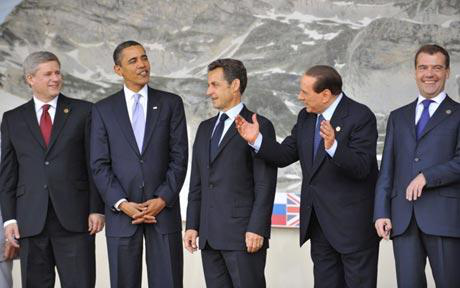

In [46]:
# view the 3rd image
cv2_imshow(img_3_pixel)

####Testing Face Detection Algorithms

#####Using Open CVs built in cascade classifier for face detection

In [6]:
# create the haar cascade 
cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [7]:
# Detect faces in the image
start = time.time()

faces = cascade.detectMultiScale(
    img_3_pixel,
    scaleFactor=1.02,
    minNeighbors=3,
    minSize=(30,30)
)

end = time.time()
print("Execution Time for Haar Cascade classifier(in seconds) : {}".format(round(end - start, 3)))

# count the no of faces detected
print("Found {} faces!".format(len(faces)))

Execution Time for Haar Cascade classifier(in seconds) : 0.433
Found 4 faces!


In [8]:
# drawing rectangles around each of the faces
for (x, y, w, h) in faces:
   cv2.rectangle(img_3_pixel, (x, y), (x+w, y+h), (240, 240, 250), 2)

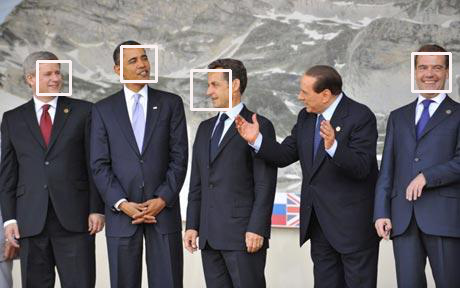

In [9]:
# viewing the 3rd image with rectangles showing location of faces detected by the haar cascade algorithm
cv2_imshow(img_3_pixel)

*The Haar cascade classifier was able to detect 4 out of the 5 faces in the image as seen from the white colored rectangles*

#####Using Histogram of Oriented Gradients(HOG) face detection model in Dlib

In [10]:
# initialize hog + svm based face detector
hog_face_detector = dlib.get_frontal_face_detector()

In [11]:
# Hog
start = time.time()

# apply face detection (hog)
faces_hog = hog_face_detector(img_3_pixel, 2)

end = time.time()
print("Execution Time for HOG(in seconds) : ", format(end-start, '.3f'))

# loop over detected faces
for face in faces_hog:
    x = face.left()
    y = face.top()
    w = face.right() - x
    h = face.bottom() - y

    # drawing rectangles over each faces
    cv2.rectangle(img_3_pixel, (x,y), (x+w,y+h), (0,255,0), 2)

# count the no of faces detected
print("Found {} faces!".format(len(faces_hog)))

Execution Time for HOG(in seconds) :  0.343
Found 4 faces!


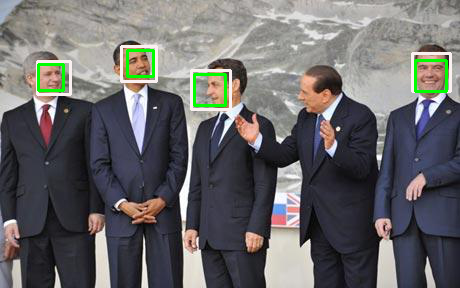

In [12]:
# viewing the 3rd image with rectangles showing location of faces detected by the hog algorithm
cv2_imshow(img_3_pixel)

*The Hog algorithm was able to detect 4 out of the 5 faces in the image as seen from the green colored rectangles*

##### Using the CNN based face detector model in Dlib

In [13]:
weights = '/content/mmod_human_face_detector.dat'

In [18]:
# initialize cnn based face detector with the weights
cnn_face_detector = dlib.cnn_face_detection_model_v1(weights)

In [15]:
start = time.time()

# apply face detection (cnn)
faces_cnn = cnn_face_detector(img_3_pixel, 2)

end = time.time()
print("Execution Time for CNN(in seconds): ", format(end - start, '.3f'))

# count the no of faces detected
print("Found {} faces!".format(len(faces_cnn)))

Execution Time for CNN(in seconds):  1.249
Found 2 faces!


In [16]:
# loop over detected faces
for face in faces_cnn:
    x = face.rect.left()
    y = face.rect.top()
    w = face.rect.right() - x
    h = face.rect.bottom() - y

    # drawing rectangles over each faces
    cv2.rectangle(img_3_pixel, (x,y), (x+w,y+h), (0,0,255), 2)

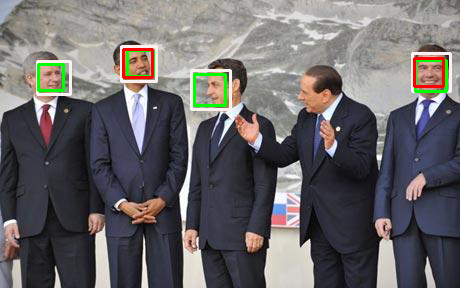

In [17]:
# viewing the 3rd image with rectangles showing location of faces detected by the cnn algorithm
cv2_imshow(img_3_pixel)

*The CNN based algorithm was only able to detect 2 of the 5 faces in the image as seen from the red colored rectangles*

In [19]:
start = time.time()
# convert the bgr image to grayscale
gray = cv2.cvtColor(img_3_pixel, cv2.COLOR_BGR2GRAY)
# apply face detection (cnn)
faces_cnn = cnn_face_detector(gray, 2)

end = time.time()
print("Execution Time for CNN(in seconds): ", format(end - start, '.3f'))

# count the no of faces detected
print("Found {} faces!".format(len(faces_cnn)))

Execution Time for CNN(in seconds):  0.246
Found 5 faces!


In [20]:
# loop over detected faces
for face in faces_cnn:
    x = face.rect.left()
    y = face.rect.top()
    w = face.rect.right() - x
    h = face.rect.bottom() - y

    # drawing rectangles over each faces
    cv2.rectangle(img_3_pixel, (x,y), (x+w,y+h), (255,0,0), 2)

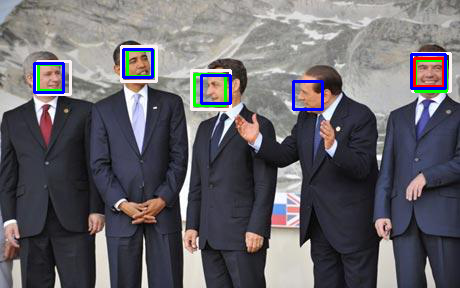

In [21]:
# viewing the 3rd image with rectangles showing location of faces detected by the cnn algorithm
cv2_imshow(img_3_pixel)

*After converting the 3rd image to grayscale, The CNN based algorithm was able to detect all of the 5 faces in the image as seen from the blue colored rectangles*

For the 3rd image, the CNN face detection model in Dlib performed best in terms of both *speed* and *accuracy* because it was able to detect all 5 faces in 0.246s which was the shortest time compared with the HOG model that detected 4/5 faces in 0.343s while the Haar cascade classifier model detected 4/5 faces in 0.433s.
The cnn model when used without converting the image to grayscale performed very poorly only detecting 2/5 faces.

**From all the different images that have been tested on, we can see that the cnn face detection model in Dlib performed best in terms of accuracy but when looking at speed, the HoG seems to be the fastest algorithm, followed by Haar Cascade classifier and CNNs.**